In [1]:
from LoaderTools.libs import LibsLoader
from AnalysisTools.analytics import AnalyticsToolkit
from AnalysisTools import visual
from matplotlib.gridspec import GridSpec


import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1
%autoreload 2

# 1. Intialize Data Handler Module

This module handles data loading, preprocessing tools (baseline removal and normalization), and well as feature extraction

In [87]:
fname = r"E:/Data/Data_LIBS/ForHolo/wrench_map"
data_handler = LibsLoader(fname)
data_handler.load_dataset(baseline_corrected = True)

In [88]:
# data_handler.baseline_correct()
data_handler.normalize_to_sum()

In [89]:
new_data = (data_handler.dataset - data_handler.dataset.min()) / (data_handler.dataset.max() - data_handler.dataset.min())

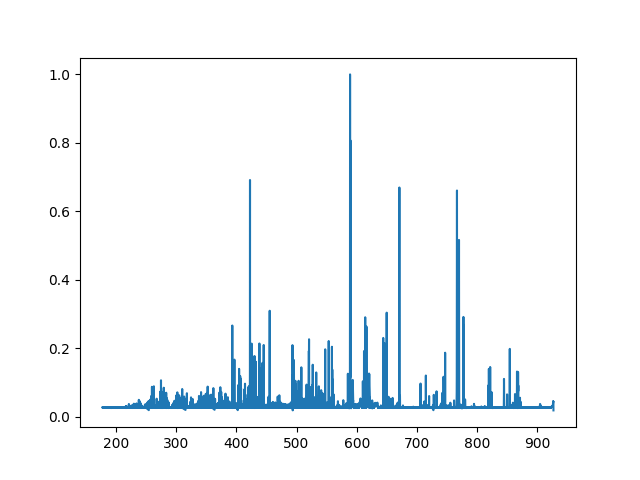

In [90]:
%matplotlib widget
plt.figure()
# plt.imshow(new_data[:, :, data_handler.wavelength_to_index(670.76)])
plt.plot(data_handler.wavelengths, np.max(new_data, axis = (0, 1)))

## 1.1 Feature Extraction

In [91]:
data_handler.automatic_feature_extraction(fft_features = 20,
                                          intens_features = 20,
                                          sigma = 1,
                                          force_recal = False)

Performing the SIR algorithm...
Operation Completed.


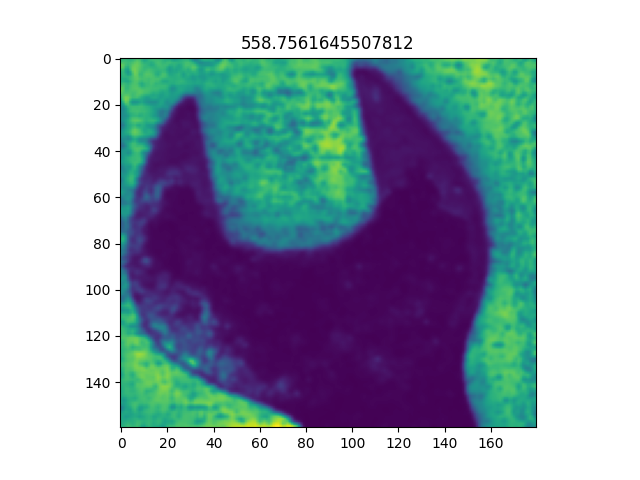

In [92]:
plt.figure()

index = 33
plt.title(data_handler.x_features[index])
plt.imshow(data_handler.features[index, :, :])

In [85]:
data_handler.manual_features([670.76, 427.19], sigma = 1)

In [86]:
data_handler.features.shape

(2, 20, 20)

# 2. Initialize the Analytics module

This module handles the is used to generate a database of element emission lines, and perform emission line identification

In [94]:
analytics = AnalyticsToolkit()
# analytics.update_elements(['V', 'Fe', 'Na', 'O', 'Cu', 'Al', 'Ag', 'Au', 'Li', 'Ti', 'Cr'])

In [97]:
counts = analytics.identify_from_elements(spectrum_or_cube = data_handler.dataset,
                                            wavelengths = data_handler.wavelengths,
                                            operation = 'max',
                                            min_intensity = 0.1,
                                            return_counts = False)

In [98]:
counts

{'Si': (0, []),
 'V': (3, [413.1112060546875, 427.1917419433594, 440.48345947265625]),
 'Co': (4,
  [341.43231201171875,
   351.44964599609375,
   352.41265869140625,
   356.9587707519531]),
 'Ca': (5,
  [422.71893310546875,
   430.2666015625,
   445.4928283691406,
   643.9519653320312,
   646.273193359375]),
 'Zn': (0, []),
 'Cr': (6,
  [300.2148132324219,
   396.79998779296875,
   425.4326171875,
   427.50091552734375,
   428.989990234375,
   520.7483520507812]),
 'Rb': (0, []),
 'Ti': (8,
  [260.66973876953125,
   261.1534118652344,
   455.4230651855469,
   498.0677490234375,
   499.0024108886719,
   499.8576354980469,
   500.5562744140625,
   522.599853515625]),
 'Li': (1, [670.768798828125]),
 'Mn': (2, [279.5016174316406, 403.0658874511719]),
 'Na': (4,
  [588.8667602539062, 589.466064453125, 818.1483154296875, 819.3818359375]),
 'Fe': (15,
  [302.03424072265625,
   356.5801696777344,
   358.07745361328125,
   361.855224609375,
   371.9220886230469,
   373.4132080078125,
   373.6

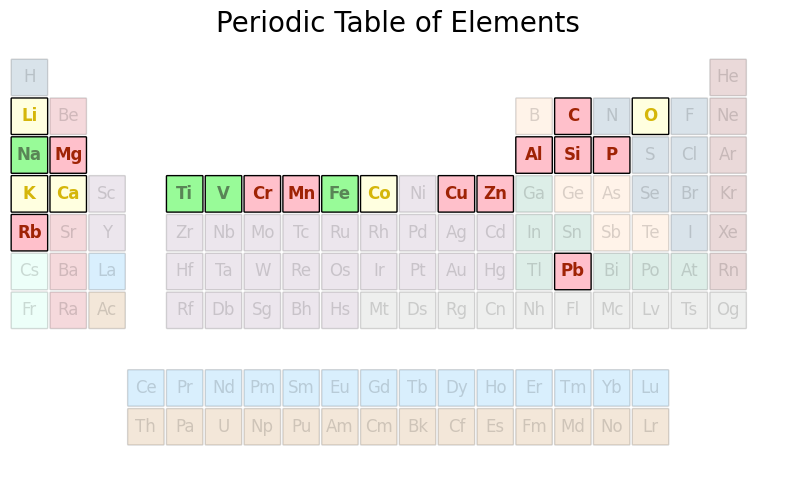

In [78]:
visual.plot_preiodic_table(counts)

In [50]:
counts = analytics.identify_from_features(x_features = data_handler.x_features,
                                            min_intensity = 0.1,
                                            return_counts = True)

In [51]:
counts

{'Ti': 3,
 'O': 3,
 'Zn': 2,
 'Na': 3,
 'Mn': 1,
 'Fe': 9,
 'K': 2,
 'Ca': 1,
 'Cr': 1,
 'V': 1}

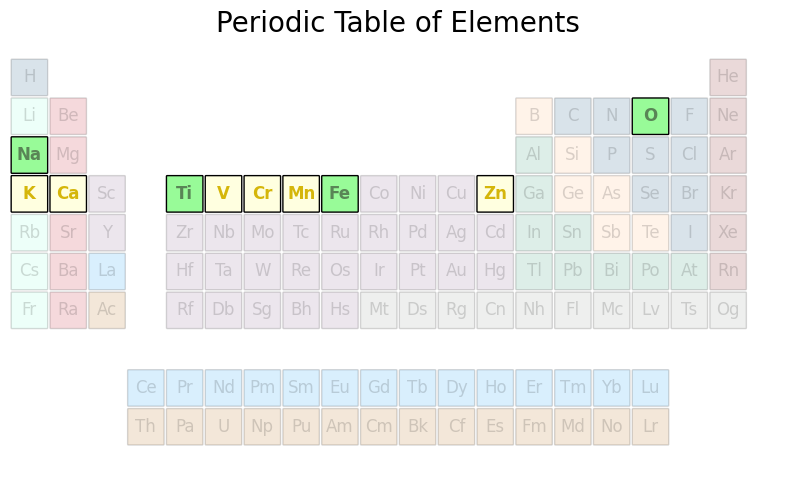

In [52]:
visual.plot_preiodic_table(counts)

## 2.1 Classify

In [103]:
labels = analytics.clustering(model = 'kmeans', 
                               n_clusters = 4, 
                               feature_cube = data_handler.features, 
                               scaler = 'minmax',
                               random_state = 10)

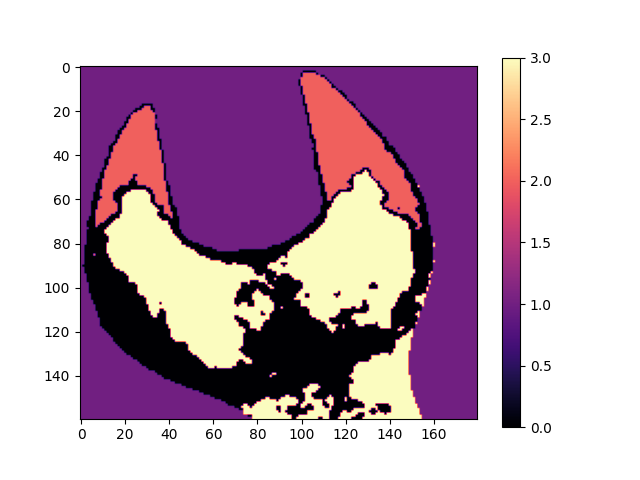

In [104]:
plt.figure()
plt.imshow(labels, cmap = 'magma')
plt.colorbar()

In [68]:
region_1 = data_handler.dataset[labels == 1]
region_0 = data_handler.dataset[labels == 0]


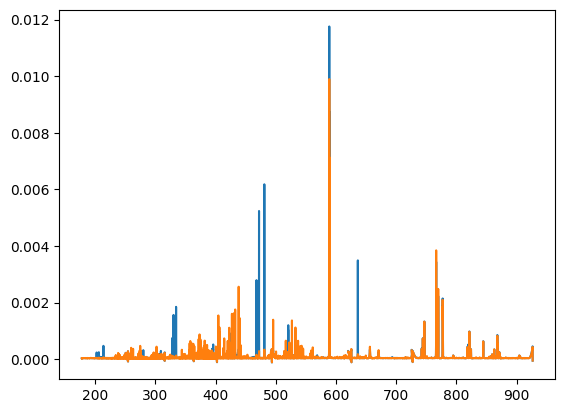

In [72]:
plt.figure()
plt.plot(data_handler.wavelengths, np.mean(region_0, axis = 0))
plt.plot(data_handler.wavelengths, np.mean(region_1, axis = 0))
